Total points for this HW: 100.

Please note: Copying and pasting other people's work is absolutely prohibited.  Any such cases will be reported to CUSP's education team and severely punished. Discussion is encouraged, and feel free to exchange ideas with your classmates, but please write your own code and do your own work.

### Question 1: Accuracy and interpretability (10 pts)

a) Describe a real-world prediction problem using urban data for which _interpretability_ of your models and results is essential, and for which it might be preferable to use decision trees rather than random forests.  Argue why this is the case. (3 pts)

We can use decision tree to predict whether a person will vote for the candidate in an election or not. Let's assume there are two candidates in an election. We can categorize voters in so many different ways: by gender, age, race, income level, education level, etc. Then we can build a decision tree. For example, male voters are more likely to vote for candidate A; senior citizens are more likely to vote for candidate A; asian voters are more likely to vote for candidate A. Then we can predict that a 70 years old chinese male are most likely to vote for candidate A.

b) Describe a real-world prediction problem using urban data for which _accuracy_ is paramount and interpretability may be less important, and for which it might be preferable to use random forests rather than decision trees.  Argue why this is the case. (3 pts)

We can use random forests to predict the cirme rate for a certain county. In this scenario, we are more focusing on the accuracy of the prediction than the process of the prediction. We don't really care about the interpretability of the the model, as long as the prediction is accurate enough.

c) Let's imagine that you want to try to get the best of both worlds (accuracy _and_ interpretability).  So you decide to start by learning a random forest classifier.  Describe at least one way of getting some interpretability out of the model by post-processing.  You could either pick a method from the literature (e.g., Domingos's work on combining multiple models or some method of computing variable importance), or come up with your own approach (doesn't have to be ground-breaking, but feel free to be creative!) (4 pts)

We can get some interpretability out of the model by computing feature importances of the model. To compute feature importances, we can change the value of each feature of the model to see how it affects the model's result.

###  Question 2: Build a decision tree for classification, step by step, following the lecture notes. Note that the dataset has been slightly modified, so you will get a different tree than the one shown in the lecture notes.  (30 points)

In [1]:
import pandas as pd
import numpy as np
import io

In [2]:
thefile = io.StringIO('MPG,cylinders,HP,weight\ngood,4,75,light\nbad,6,90,medium\nbad,4,110,medium\nbad,8,175,weighty\nbad,6,95,medium\nbad,4,94,light\nbad,4,95,light\nbad,8,139,weighty\nbad,8,190,weighty\nbad,8,145,weighty\nbad,6,100,medium\ngood,4,92,medium\nbad,6,100,weighty\nbad,8,170,weighty\ngood,4,89,medium\ngood,4,65,light\nbad,6,85,medium\ngood,4,81,light\nbad,6,95,medium\nbad,4,93,light')
df = pd.read_csv(thefile)
df

,MPG,cylinders,HP,weight
0,good,4,75,light
1,bad,6,90,medium
2,bad,4,110,medium
3,bad,8,175,weighty
4,bad,6,95,medium
5,bad,4,94,light
6,bad,4,95,light
7,bad,8,139,weighty
8,bad,8,190,weighty
9,bad,8,145,weighty


### Please use numpy and pandas to do the computation for parts a) through f).  Do not use an existing decision tree implementation like sklearn for this question.

a) Start with the entire dataset and find the most common MPG value. (2 pts)

In [3]:
# your code here
df.MPG.value_counts()

bad     15
good     5
Name: MPG, dtype: int64

In [4]:
def InformationGain(goodY,badY,goodN,badN):
    def F(X,Y):
        val1 = X*np.log2(1.*(X+Y)/X) if X>0 else 0
        val2 = Y*np.log2(1.*(X+Y)/Y) if Y>0 else 0
        return val1+val2
    return (F(goodY+goodN,badY+badN)-F(goodY,badY)-F(goodN,badN)) / (goodY+goodN+badY+badN)

In [5]:
InformationGain(9,0,0,3)

0.81127812445913283

b) Enumerate all the possible binary questions you could ask for each discrete-valued variable.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts)

In [6]:
# your code here
# cylinders = 4 or not
df_cylinders = df[df.cylinders == 4]
df_cylinders.MPG.value_counts()

good    5
bad     4
Name: MPG, dtype: int64

In [7]:
df_cylinders1 = df[df.cylinders != 4]
df_cylinders1.MPG.value_counts()

bad    11
Name: MPG, dtype: int64

In [8]:
InformationGain(5,4,0,11)

0.36529389753193281

In [9]:
# cylinders = 6 or not
df_cylinders2 = df[df.cylinders == 6]
df_cylinders2.MPG.value_counts()

bad    6
Name: MPG, dtype: int64

In [10]:
df_cylinders3 = df[df.cylinders != 6]
df_cylinders3.MPG.value_counts()

bad     9
good    5
Name: MPG, dtype: int64

In [11]:
InformationGain(0,6,5,9)

0.15307795338969116

In [12]:
# cylinders = 8 or not
df_cylinders4 = df[df.cylinders == 8]
df_cylinders4.MPG.value_counts()

bad    5
Name: MPG, dtype: int64

In [13]:
df_cylinders5 = df[df.cylinders != 8]
df_cylinders5.MPG.value_counts()

bad     10
good     5
Name: MPG, dtype: int64

In [14]:
InformationGain(0,5,5,10)

0.12255624891826571

In [15]:
# weight = light or not
df_weight = df[df.weight == 'light']
df_weight.MPG.value_counts()

bad     3
good    3
Name: MPG, dtype: int64

In [16]:
df_weight1 = df[df.weight != 'light']
df_weight1.MPG.value_counts()

bad     12
good     2
Name: MPG, dtype: int64

In [17]:
InformationGain(3,3,2,12)

0.097107179451503628

In [18]:
# weight = medium or not
df_weight2 = df[df.weight == 'medium']
df_weight2.MPG.value_counts()

bad     6
good    2
Name: MPG, dtype: int64

In [19]:
df_weight3 = df[df.weight != 'medium']
df_weight3.MPG.value_counts()

bad     9
good    3
Name: MPG, dtype: int64

In [20]:
InformationGain(2,6,3,9)

8.8817841970012528e-17

In [21]:
# weight = weighty or not
df_weight4 = df[df.weight == 'weighty']
df_weight4.MPG.value_counts()

bad    6
Name: MPG, dtype: int64

In [22]:
df_weight5 = df[df.weight != 'weighty']
df_weight5.MPG.value_counts()

bad     9
good    5
Name: MPG, dtype: int64

In [23]:
InformationGain(0,6,5,9)

0.15307795338969116

c) Enumerate all the possible binary questions you could ask for the real-valued variable HP.  For each such split, compute the numbers of "good" and "bad" MPG vehicles in each of the two child nodes, and compute the information gain using the provided function above. (5 pts) 

NOTE: if you'd like, you can just use all midpoints between consecutive values of the sorted HP attribute.  You are not required to exclude provably suboptimal questions like we did in the lecture.

In [24]:
# your code here
# HP > 78 or not
df_hp = df[df.HP > 78]
df_hp.MPG.value_counts()

bad     15
good     3
Name: MPG, dtype: int64

In [25]:
df_hp1 = df[df.HP <= 78]
df_hp1.MPG.value_counts()

good    2
Name: MPG, dtype: int64

In [26]:
InformationGain(3,15,2,0)

0.22625794497561413

In [27]:
# HP > 87 or not
df_hp2 = df[df.HP > 87]
df_hp2.MPG.value_counts()

bad     14
good     2
Name: MPG, dtype: int64

In [28]:
df_hp3 = df[df.HP <= 87]
df_hp3.MPG.value_counts()

good    3
bad     1
Name: MPG, dtype: int64

In [29]:
InformationGain(2,14,3,1)

0.21417094500762929

In [30]:
# HP > 89.5 or not
df_hp4 = df[df.HP > 89.5]
df_hp4.MPG.value_counts()

bad     14
good     1
Name: MPG, dtype: int64

In [31]:
df_hp5 = df[df.HP <= 89.5]
df_hp5.MPG.value_counts()

good    4
bad     1
Name: MPG, dtype: int64

In [32]:
InformationGain(1,14,4,1)

0.36577659947122626

In [33]:
# HP > 91 or not
df_hp6 = df[df.HP > 91]
df_hp6.MPG.value_counts()

bad     13
good     1
Name: MPG, dtype: int64

In [34]:
df_hp7 = df[df.HP <= 91]
df_hp7.MPG.value_counts()

good    4
bad     2
Name: MPG, dtype: int64

In [35]:
InformationGain(1,13,4,2)

0.27592674559417307

In [36]:
# HP > 93.5 or not
df_hp8 = df[df.HP > 93.5]
df_hp8.MPG.value_counts()

bad    12
Name: MPG, dtype: int64

In [37]:
df_hp9 = df[df.HP <= 93.5]
df_hp9.MPG.value_counts()

good    5
bad     3
Name: MPG, dtype: int64

In [38]:
InformationGain(0,12,5,3)

0.4295045232891469

d) Based on your results for parts b and c, what is the optimal binary split of the data?  Of the two child nodes created by this split, which (if any) would require further partitioning? (4 pts)

### The optimal binary split of the data is the HP > 93.5 or not, since it has the highest gain, which is 0.43.

e) Repeat parts a through d until all training data points are perfectly classified by the resulting tree. (6 pts)

In [39]:
# your code here
# cylinders is 4 or not
df_hp_cylinders = df_hp9[df_hp9.cylinders == 4]
df_hp_cylinders.MPG.value_counts()

good    5
bad     1
Name: MPG, dtype: int64

In [40]:
df_hp_cylinders1 = df_hp9[df_hp9.cylinders != 4]
df_hp_cylinders1.MPG.value_counts()

bad    2
Name: MPG, dtype: int64

In [41]:
InformationGain(5,1,0,2)

0.4669171866886993

In [42]:
# HP > 78 or not
df_hp_hp = df_hp9[df_hp9.HP > 78]
df_hp_hp.MPG.value_counts()

good    3
bad     3
Name: MPG, dtype: int64

In [43]:
df_hp_hp1 = df_hp9[df_hp9.HP <= 78]
df_hp_hp1.MPG.value_counts()

good    2
Name: MPG, dtype: int64

In [44]:
InformationGain(3,3,2,0)

0.20443400292496494

In [45]:
# HP > 87 or not
df_hp_hp2 = df_hp9[df_hp9.HP > 87]
df_hp_hp2.MPG.value_counts()

good    2
bad     2
Name: MPG, dtype: int64

In [46]:
df_hp_hp3 = df_hp9[df_hp9.HP <= 87]
df_hp_hp3.MPG.value_counts()

good    3
bad     1
Name: MPG, dtype: int64

In [47]:
InformationGain(2,2,3,1)

0.048794940695398581

In [48]:
# HP > 89.5 or not
df_hp_hp4 = df_hp9[df_hp9.HP > 89.5]
df_hp_hp4.MPG.value_counts()

bad     2
good    1
Name: MPG, dtype: int64

In [49]:
df_hp_hp5 = df_hp9[df_hp9.HP <= 89.5]
df_hp_hp5.MPG.value_counts()

good    4
bad     1
Name: MPG, dtype: int64

In [50]:
InformationGain(1,2,4,1)

0.15886800584992999

In [51]:
# HP > 91 or not
df_hp_hp6 = df_hp9[df_hp9.HP > 91]
df_hp_hp6.MPG.value_counts()

bad     1
good    1
Name: MPG, dtype: int64

In [52]:
df_hp_hp7 = df_hp9[df_hp9.HP <= 91]
df_hp_hp7.MPG.value_counts()

good    4
bad     2
Name: MPG, dtype: int64

In [53]:
InformationGain(1,1,4,2)

0.015712127384097885

In [54]:
# Weight = light or not
df_hp_weight = df_hp9[df_hp9.weight == 'light']
df_hp_weight.MPG.value_counts()

good    3
bad     1
Name: MPG, dtype: int64

In [55]:
df_hp_weight1 = df_hp9[df_hp9.weight != 'light']
df_hp_weight1.MPG.value_counts()

good    2
bad     2
Name: MPG, dtype: int64

In [56]:
InformationGain(3,1,2,2)

0.048794940695398581

### The optimal binary split of the data is the Cylinders = 4 or not, since it has the highest gain, which is 0.47.

In [57]:
df_cylinders_hp = df_hp_cylinders[df_hp_cylinders.HP > 78]
df_cylinders_hp.MPG.value_counts()

good    3
bad     1
Name: MPG, dtype: int64

In [58]:
df_cylinders_hp1 = df_hp_cylinders[df_hp_cylinders.HP <= 78]
df_cylinders_hp1.MPG.value_counts()

good    2
Name: MPG, dtype: int64

In [59]:
InformationGain(3,1,2,0)

0.10917033867559904

In [60]:
df_cylinders_hp2 = df_hp_cylinders[df_hp_cylinders.HP > 85]
df_cylinders_hp2.MPG.value_counts()

good    2
bad     1
Name: MPG, dtype: int64

In [61]:
df_cylinders_hp3 = df_hp_cylinders[df_hp_cylinders.HP <= 85]
df_cylinders_hp3.MPG.value_counts()

good    3
Name: MPG, dtype: int64

In [62]:
InformationGain(2,1,3,0)

0.19087450462110947

In [63]:
df_cylinders_weight = df_hp_cylinders[df_hp_cylinders.weight == 'light']
df_cylinders_weight.MPG.value_counts()

good    3
bad     1
Name: MPG, dtype: int64

In [64]:
df_cylinders_weight1 = df_hp_cylinders[df_hp_cylinders.weight != 'light']
df_cylinders_weight1.MPG.value_counts()

good    2
Name: MPG, dtype: int64

In [65]:
InformationGain(3,1,2,0)

0.10917033867559904

### The optimal binary split of the data is the HP > 85 or not, since it has the highest gain, which is 0.19.

In [66]:
df_cylinders_hp2

,MPG,cylinders,HP,weight
11,good,4,92,medium
14,good,4,89,medium
19,bad,4,93,light


In [67]:
df_hp_weight = df_cylinders_hp2[df_cylinders_hp2.weight == 'medium']
df_hp_weight.MPG.value_counts()

good    2
Name: MPG, dtype: int64

In [68]:
df_hp_weight1 = df_cylinders_hp2[df_cylinders_hp2.weight != 'medium']
df_hp_weight1.MPG.value_counts()

bad    1
Name: MPG, dtype: int64

In [69]:
InformationGain(2,0,0,1)

0.91829583405448945

f) Draw or show the final decision tree in a format of your choice.  The decision to make at each step and the predicted value at each leaf node must be clear. (4 pts)

Your answer here.

In [70]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://github.com/a627142126/PUI2018_jl9760/blob/master/ML_CUSP/Screen%20Shot%202019-02-27%20at%2014.14.21.png?raw=true")

g) Classify each of the following four vehicles as having "good" or "bad" fuel efficiency (miles per gallon).  Do this by hand using the tree structure learned in part f. (4 pts)

BAD,8,70,light

BAD,6,113,medium

GOOD,4,83,weighty

BAD,4,95,weighty


### Question 3, Predicting burden of disease （40 pts)

In [71]:
data=pd.read_csv("Burden of diarrheal illness by country.csv")
data.head(3)

,Country,FrxnPeaceIn10,ODA4H2OPcptaDol,RenewResm3PcptaYr,SustAccImprWatRur,SustAccImprWatUrb,SustAccImprSanRur,SustAccImprSanUrb,TotHlthExpPctofGDP,GenGovtPctofTotHlthExp,ExtResHlthPctTotExpHlth,PCptaGovtExpHlthAvgExcRt,GDPPCptaIntDol,AdultLtrcyRate,FemaleLtrcyRate,BurdenOfDisease
0,Afghanistan,0.1,0.16,2986,0.10891,0.18812,0.049505,0.15842,0.065,0.395,0.4560,4,430,0.35644,0.20792,awful
1,Albania,1.0,5.58,13306,0.94059,0.98020,0.801980,0.98020,0.065,0.417,0.0340,49,6158,0.85644,0.78713,low
2,Algeria,0.0,0.33,473,0.79208,0.91089,0.811880,0.98020,0.041,0.808,0.0005,71,4860,0.69307,0.60396,high


### Data dictionary

NAME: Burden of diarrheal illness by country

SIZE: 130 Countries, 16 Variables

VARIABLE DESCRIPTIONS:

Country: Country name

FrxnPeaceIn10: Fraction of the past ten years in which a country has been at peace 

ODA4H2OPcptaDol: Per Capita Official Developmental Assistance for water projects

RenewResm3PcptaYr: Renewable Water Resources in cubic meters per capita per year

SustAccImprWatRur: Fraction of rural population with sustainable access to improved water

SustAccImprWatUrb: Fraction of urban population with sustainable access to improved water

SustAccImprSanRur: Fraction of rural population with sustainable access to improved sanitation

SustAccImprSanUrb: Fraction of urban population with sustainable access to improved sanitation

TotHlthExpPctofGDP: Fraction of a country's GDP devoted to health spending

GenGovtPctofTotHlthExp: The fraction of total health expenditures for a country which is provided by the government

ExtResHlthPctTotExpHlth: The fraction of total health expenditures for a country which is comes from sources external to the country

PCptaGovtExpHlthAvgExcRt: Per Capita Government Health Expenditures at the average exchange rate

GDPPCptaIntDol: Gross Domestic Product per capita in international dollars

AdultLtrcyRate: Adult Literacy rate

FemaleLtrcyRate: Female Literacy rate

BurdenOfDisease: Our target variable for classification.  The burden of disease due to diarrheal illness, categorized into "low", "medium", "high", and "awful" quartiles.  For each country, we have estimates of the number of Disability-Adjusted Life Years lost per 1000 persons per year (DALYs) due to diarrheal illness.  Countries with "low" burden of disease have up to 2.75345 DALYs; countries with "medium" burden of disease have between 2.75345 and 8.2127 DALYs; countries with "high" burden of disease have between 8.2127 and 26.699 DALYs; and countries with "awful" burden of diease have more than 26.699 DALYs.

### Your goal is to train a decision tree classifier for the attribute “BurdenOfDisease" using all other variables (except country name) as features with sklearn.tree.DecisionTreeClassifier. 
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

a) Please choose a train/test split and choose a hyper-parameter governing model simplicity, for example, the maximum tree depth or maximum number of leaf nodes. Then, fit your decision tree classifier (using the training set) for different values of this parameter and for each such value, record the corresponding classification accuracy on the test set. (10 pts)

In [72]:
from sklearn import linear_model

In [73]:
X=data.iloc[:,1:15]
y=data.loc[:, 'BurdenOfDisease']
print(X.shape)
print(y.shape)

(130, 14)
(130,)


In [74]:
X=pd.get_dummies(X)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

# your code here
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=999)
print(X_train.head())

    FrxnPeaceIn10  ODA4H2OPcptaDol  RenewResm3PcptaYr  SustAccImprWatRur  \
7             1.0             0.00                 66            0.85149   
53            1.0             8.04             317000            0.82178   
15            1.0             4.19               9345            0.89109   
36            0.4             0.12              25183            0.28713   
12            1.0             2.87              45564            0.59406   

    SustAccImprWatUrb  SustAccImprSanRur  SustAccImprSanUrb  \
7             0.97030            0.99010            0.99010   
53            0.82178            0.59406            0.85149   
15            0.99010            0.24752            0.56436   
36            0.82178            0.22772            0.42574   
12            0.85149            0.69307            0.64356   

    TotHlthExpPctofGDP  GenGovtPctofTotHlthExp  ExtResHlthPctTotExpHlth  \
7                0.064                   0.475                    0.002   
53            

In [84]:
OS=[]
for i in range(1,30):
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    OS.append(dt.score(X_test,y_test))

# in sample accuracy
print('In sample accuracy:',dt.score(X_train,y_train))

# out of sample accuracy
print('Out of sample accuracy:',dt.score(X_test,y_test))

In sample accuracy: 1.0
Out of sample accuracy: 0.692307692308


In [85]:
print(OS, np.mean(OS))

[0.48717948717948717, 0.58974358974358976, 0.61538461538461542, 0.61538461538461542, 0.64102564102564108, 0.66666666666666663, 0.69230769230769229, 0.61538461538461542, 0.64102564102564108, 0.64102564102564108, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229, 0.64102564102564108, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.66666666666666663, 0.61538461538461542, 0.64102564102564108, 0.61538461538461542, 0.61538461538461542, 0.66666666666666663, 0.66666666666666663, 0.69230769230769229] 0.645446507515


b) Make a plot of accuracy vs. simplicity for different values of the hyper-parameter chosen in part a). That is, the x-axis should be hyper-parameter value (e.g. tree depth) and the y-axis should be accuracy. (10 pts)

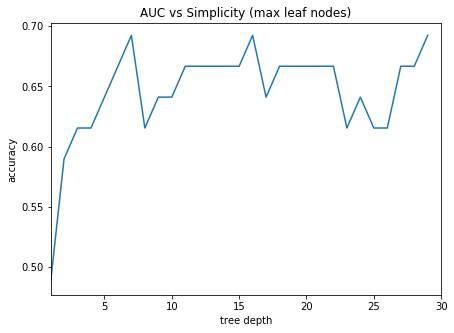

In [86]:
import matplotlib.pylab as plt

# your code here
plt.figure(figsize=(7,5))
plt.plot(range(1,30),OS)
plt.xlabel("tree depth")
plt.ylabel("accuracy")
plt.title("AUC vs Simplicity (max leaf nodes)")
plt.xlim(1,30)
plt.show()

c) Tune the hyper-parameter you choose in part a) by cross-validation using the training data. You can choose to use the GridSearchCV package from sklearn or write your own code to do cross-validation by spliting the training data into training and validation data. What is the out of sample accuracy after tuning the hyper-parameter? (10 pts)

In [79]:
from sklearn.model_selection import GridSearchCV

param_grid ={'max_depth':range(1,30)}

OS=[]
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = i)
    dt=DecisionTreeClassifier()
    gr=GridSearchCV(dt,param_grid=param_grid)
    rs=gr.fit(X_train,y_train)
    print(rs.best_params_)
    OS.append(rs.score(X_test,y_test))
print(np.mean(OS))

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 14}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 16}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 16}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 26}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 9}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 11}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 6}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 12}


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_depth': 10}
{'max_depth': 9}
0.623076923077


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### The out of sample accuracy after tuning the hyper-parameter is 0.623076923077.

d) Visualize a simple decision tree (e.g., with max_depth = 2 or 3) learned from the data.  To do so, given your decision tree dt, you can use the code below, then copy and paste the resulting output into http://www.webgraphviz.com.  Alternatively, if you have graphviz installed on your machine, you can use that. (5 pts)

In [80]:
from sklearn import tree

# your code here
from sklearn import tree

dt = DecisionTreeClassifier(max_depth=2) # just to keep it simple for visualization
dt.fit(X_train,y_train)


thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="GDPPCptaIntDol <= 2978.5, samples = 91, value = [21, 23, 24, 23], class = low", fillcolor="#399de504"] ;
1 [label="SustAccImprSanRur <= 0.416, samples = 36, value = [20, 15, 0, 1], class = awful", fillcolor="#e581393d"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="samples = 27, value = [20, 7, 0, 0], class = awful", fillcolor="#e58139a6"] ;
1 -> 2 ;
3 [label="samples = 9, value = [0, 8, 0, 1], class = high", fillcolor="#47e539df"] ;
1 -> 3 ;
4 [label="FemaleLtrcyRate <= 0.938, samples = 55, value = [1, 8, 24, 22], class = low", fillcolor="#399de50f"] ;
0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
5 [label="samples = 33, value = [1, 8, 4, 20], class = medium", fillcolor="#d739e57a"] ;
4 -> 5 ;
6 [label="samples = 22, value = [0, 0, 20, 2], class = low", fillcolor="#399de5e6"] ;
4 -> 6 ;
}


In [81]:
#from IPython.display import Image
#from IPython.core.display import HTML 
Image(url= "https://github.com/a627142126/PUI2018_jl9760/blob/master/ML_CUSP/graphviz.png?raw=true")

### Question 4, Fit a random forest to the data from question 3 (20 pts)

a) Please use the same test/train split from previous question and feel free to tune the hyper-parameters for Random Forest model using training data. The package from sklearn is here: http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html.
Then please report your out of sample prediction result and compare this model's performance with 3c). (10 pts)

In [82]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import GridSearchCV
OS_new = []
# your code here
#rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_depth=10)
#rf.fit(X_train, y_train)
#pred=rf.predict_proba(X_test)[:,1]
for i in range(1,51,5):
    rf = RandomForestClassifier(n_estimators=30, n_jobs=-1,max_depth=10)
    rf.fit(X_train, y_train)
    OS_new.append(rf.score(X_test,y_test))
print(OS_new, np.mean(OS_new))

[0.66666666666666663, 0.71794871794871795, 0.69230769230769229, 0.66666666666666663, 0.64102564102564108, 0.64102564102564108, 0.69230769230769229, 0.61538461538461542, 0.66666666666666663, 0.71794871794871795] 0.671794871795


### The out of sample accuracy is 0.671794871795, which is slightly higher than the result from 3c.

b) Write one paragraph comparing the results from those two models (Random Forest vs Decision Tree) in terms of both accuracy and interpretability. (10 pts)

In terms of accuracy, I ran the models several times. The accuracy of the Random Forest Model is always slightly higher than the Decision Tree. In terms of interpretability, the interpretability of the Random Tree is higher than the Random Forest. We can clearly see the feature importances of the Decision Tree model.